# Bank Marketing Campaign Analysis

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The goal is to predict if the client will subscribe a term deposit.

Data is from UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/222/bank+marketing

## Data Preparation

### Reading the Dataset

In [33]:
import pandas as pd

data reading

In [34]:
banking_data = pd.read_csv(r'C:\Users\windo\OneDrive\Documents\VSCode\Day 3\bank-additional-full.csv',  delimiter=";")
banking_data.shape[0]

41188

In [35]:
print('rows:' + str(banking_data.shape[0]))
print(banking_data.dtypes)

rows:41188
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


### Dropping Unnecessary Columns

In [36]:
df = banking_data.copy()
banking_data = banking_data.drop(['duration'], axis = 1)


### Handling Missing Values

In [37]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Removing Duplicates

In [38]:
duplicate = df.duplicated()
print('Before, Are there any duplicates:', duplicate.any())
df.drop_duplicates(inplace = True)

Before, Are there any duplicates: True


In [39]:
df = df.reset_index(drop = True)
print('After, Are there any duplicates:', df.duplicated().any())

After, Are there any duplicates: False


## Handling Outliers

### Visualizing Outliers

In [40]:
import scipy.stats as stats
import matplotlib.pyplot as plt

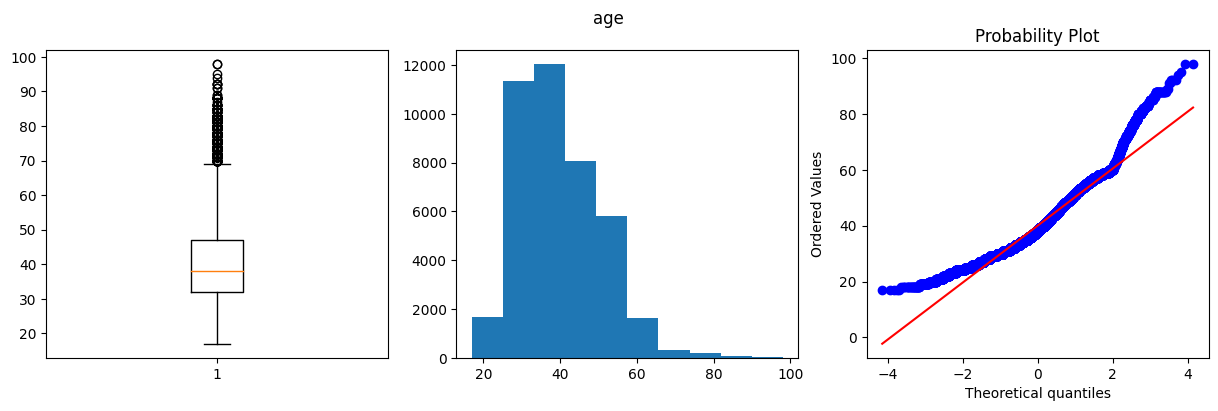

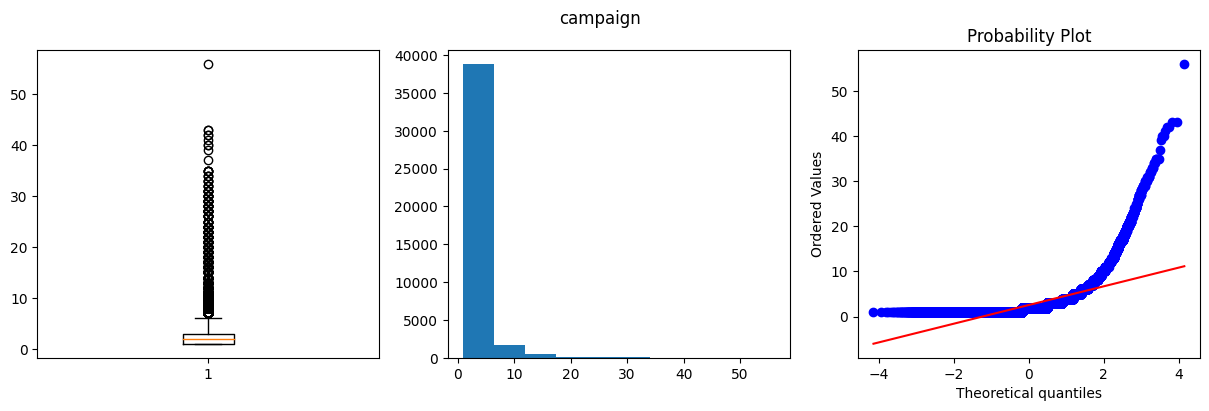

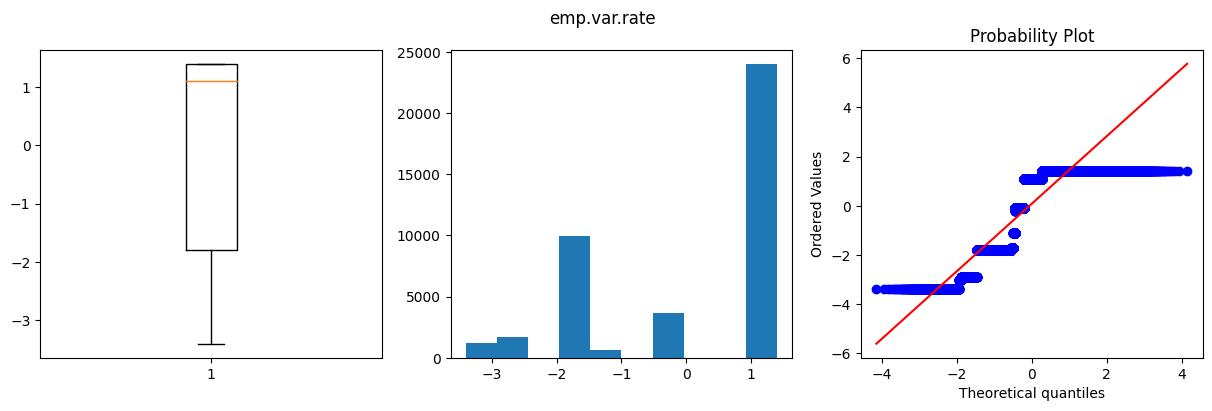

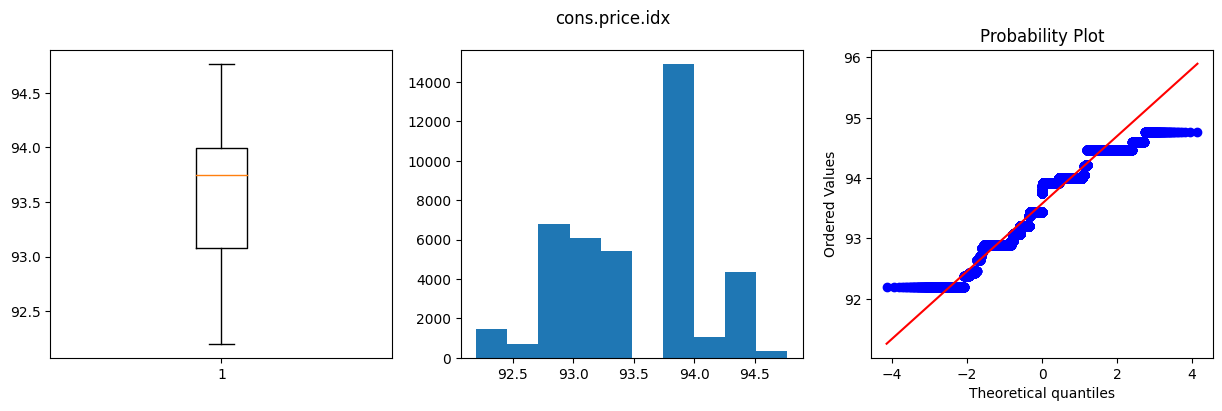

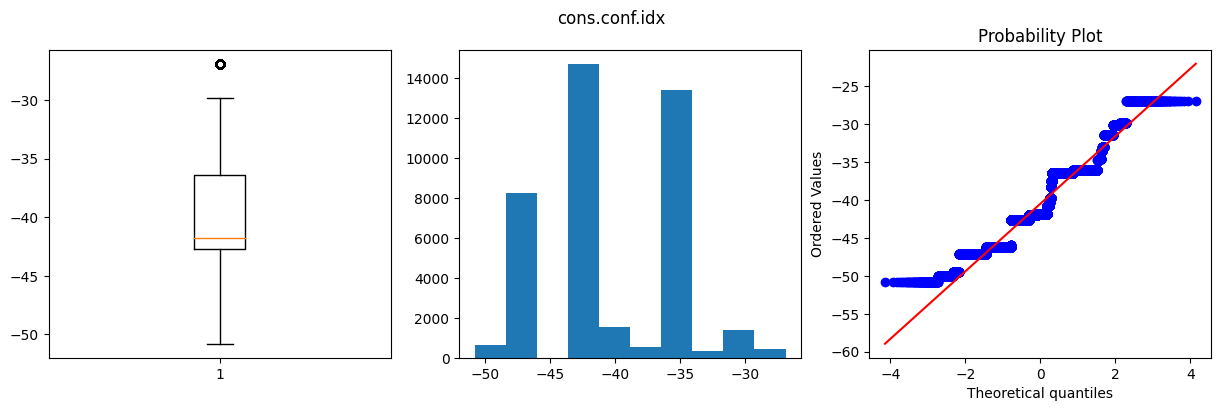

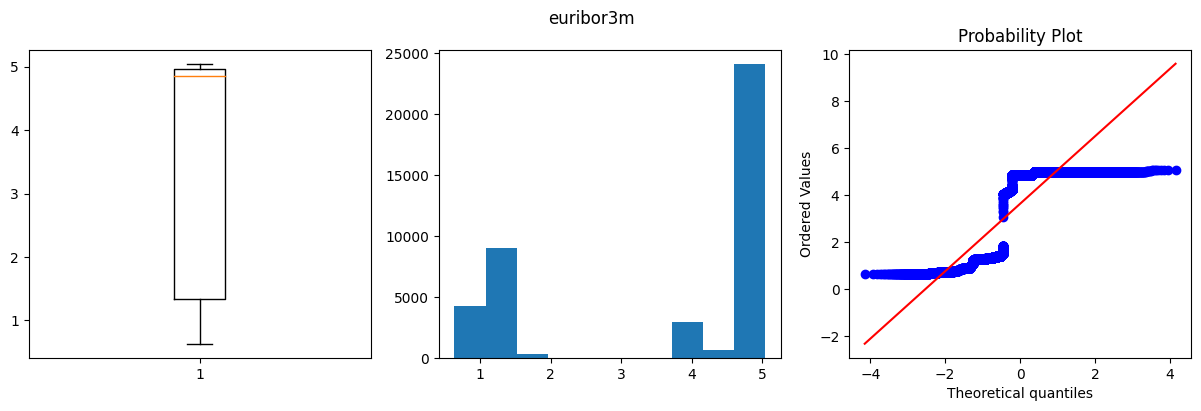

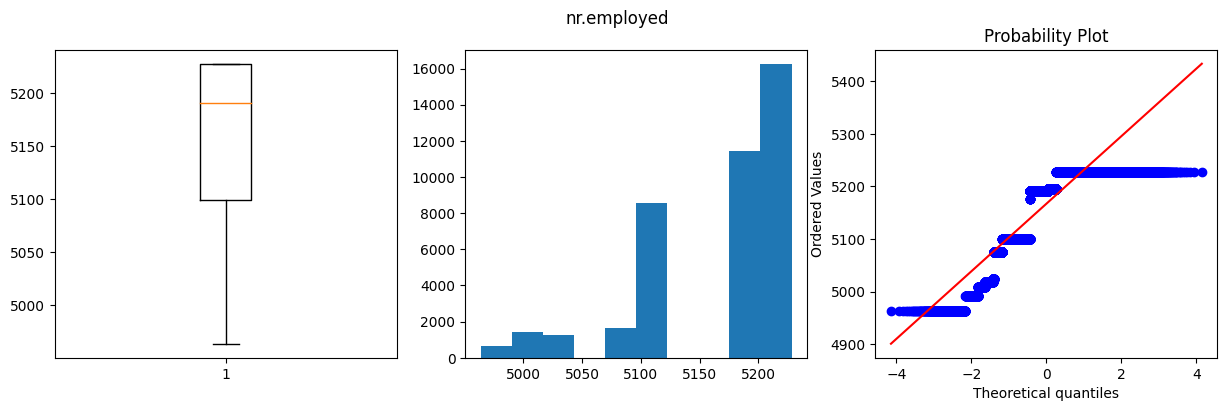

In [41]:
colmn = ['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

for col in colmn:
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,4))
    fig.suptitle(col)
    axes[0].boxplot(df[col])
    axes[1].hist(df[col])
    stats.probplot(df[col], dist ='norm', plot = axes[2])
    plt.show()

### Removing Outliers

In [44]:
import seaborn as sns

#### Removing Outliers from 'campaign'

Before Shape: (41176, 21)
After Shape: (41176, 21)


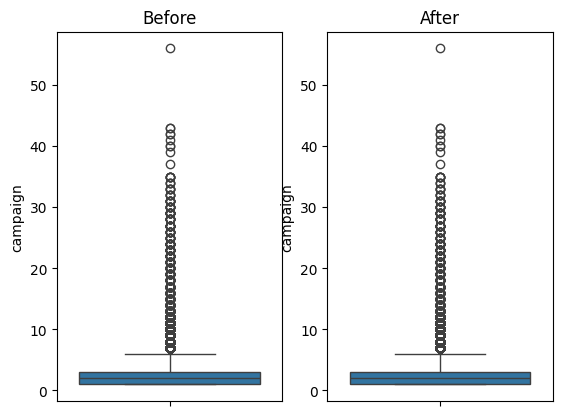

In [47]:
fig, axes = plt.subplots(1,2)

df_df = df
col = 'campaign'
print("Before Shape:",df_df.shape)
axes[0].title.set_text("Before")
sns.boxplot(df_df[col],orient='v',ax=axes[0])
# Removing campaign above 50 
df2 = df_df[ (df_df[col]<50)]
print("After Shape:",df_df.shape)
axes[1].title.set_text("After")
sns.boxplot(df_df[col],orient='v',ax=axes[1])
df=df_df;
plt.show()
# reset indices after dropping rows
df=df.reset_index(drop=True)

In [51]:
print(df_df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


#### Removing Outliers from 'cons.conf.idx'

Before Shape: (41176, 21)
After Shape: (40730, 21)


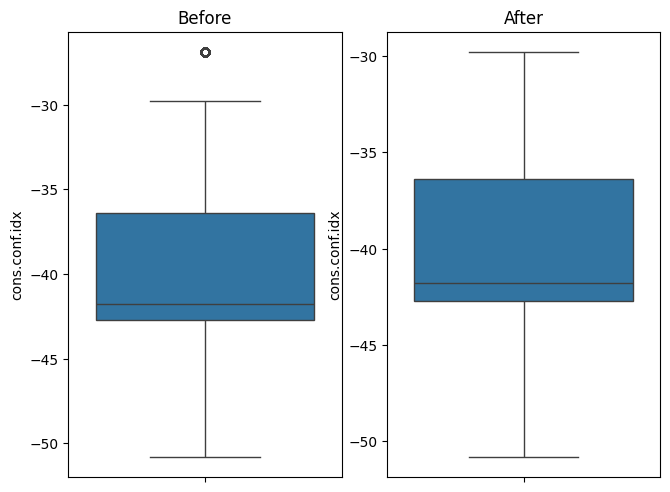

In [52]:
# remove outlier of cons.price.idx
fig, axes = plt.subplots(1,2)
plt.tight_layout(pad=0.2)
df_df = df
col='cons.conf.idx'
print("Before Shape:",df_df.shape)
axes[0].title.set_text("Before")
sns.boxplot(df_df[col],orient='v',ax=axes[0])
# Removing cons_price_idx above -28 
df_df = df_df[ (df_df[col]<-28)]
print("After Shape:",df_df.shape)
axes[1].title.set_text("After")
sns.boxplot(df_df[col],orient='v',ax=axes[1])
df=df_df;
plt.show()
# reset indices after dropping rows
df=df.reset_index(drop=True)

## Feature Engineering

###  Feature Encoding

In [54]:
import numpy as np

In [57]:
df_label = df.select_dtypes(include = object)
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40730 entries, 0 to 40729
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          40730 non-null  object
 1   marital      40730 non-null  object
 2   education    40730 non-null  object
 3   default      40730 non-null  object
 4   housing      40730 non-null  object
 5   loan         40730 non-null  object
 6   contact      40730 non-null  object
 7   month        40730 non-null  object
 8   day_of_week  40730 non-null  object
 9   poutcome     40730 non-null  object
 10  y            40730 non-null  object
dtypes: object(11)
memory usage: 3.4+ MB


In [58]:
df['contact'] = df['contact'].astype('category').cat.codes

In [59]:
df_label.nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

In [63]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
columns = ['job','marital','education','default','housing','loan','month','day_of_week','poutcome']
df_encoded = pd.DataFrame (encoder.fit_transform(df[columns]))
df_encoded.columns = encoder.get_feature_names_out(columns)
df.drop(columns ,axis=1, inplace=True)
df= pd.concat([df, df_encoded ], axis=1)

### Data Transformation

In [64]:
#Do the logarithm trasnformations for required features
from sklearn.preprocessing import FunctionTransformer
logarithm_transformer = FunctionTransformer(np.log1p, validate=True)
# apply the transformation to your data
columns = ['age', 'campaign', 'previous']
to_right_skewed = logarithm_transformer.transform(df[columns])
df['age'] = to_right_skewed[:, 0]
df['campaign'] = to_right_skewed[:, 1]
df['previous'] = to_right_skewed[:, 2]

c:\Users\windo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [71]:
df.columns

Index(['age', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_

In [72]:
columns = ['nr.employed']
exp_transformer = FunctionTransformer(lambda x:x**2, validate=True) # FunctionTransformer(np.exp, validate=True) #
to_left_skewed = exp_transformer.transform(df[columns])
df['nr.employed'] = to_left_skewed[:, 0]

c:\Users\windo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


### Variable Discretization

In [73]:
from sklearn.preprocessing import KBinsDiscretizer
data = pd.DataFrame(df, columns=['age'])
# fit the scaler to the  data
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans') 
discretizer.fit(data)
_discretize = discretizer.transform(data)
x = pd.DataFrame(_discretize, columns=['age'])
df['age'] = x['age']

c:\Users\windo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [74]:
df['age'].head()

0    7.0
1    7.0
2    4.0
3    4.0
4    7.0
Name: age, dtype: float64

### Feature Scaling

In [75]:
from sklearn.preprocessing import StandardScaler
df2 = df
# Removing Categorical Features before the feature scaling
columns = df.columns
# Continous col
columns_cont = np.delete(columns,np.s_[9:])
# Categorical col
columns_categorical = np.delete(columns,np.s_[0:9])
# except age since it is discretized
except_age_cont = np.delete(columns_cont, [0])
# Applying Standardization 
# Init StandardScaler
scaler = StandardScaler()
#Transformation of training dataset features
Except = pd.DataFrame(df, columns = except_age_cont)
scaler.fit(Except)
df = pd.DataFrame(scaler.transform(Except), columns = except_age_cont).join(df[columns_categorical])
df = df.join(df2['age'])
# Get age in last column to first column
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]  #make last column first
df=df[cols]

## Splitting the Dataset

In [76]:
from sklearn.model_selection import train_test_split
# set apparent temperature as target
columns_value = df.columns
index = np.argwhere(columns_value == 'y')
columns_value_new = np.delete(columns_value, index)
data = pd.DataFrame(df, columns=columns_value_new)
# target as Y
selected_columns = ['y']
y_true = df[selected_columns].copy()
# X as indipendent 
X = data
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(32584, 62) (32584, 1)
(8146, 62) (8146, 1)


##  Data Analysis

### Correlation Matrix

<Figure size 1600x1600 with 0 Axes>

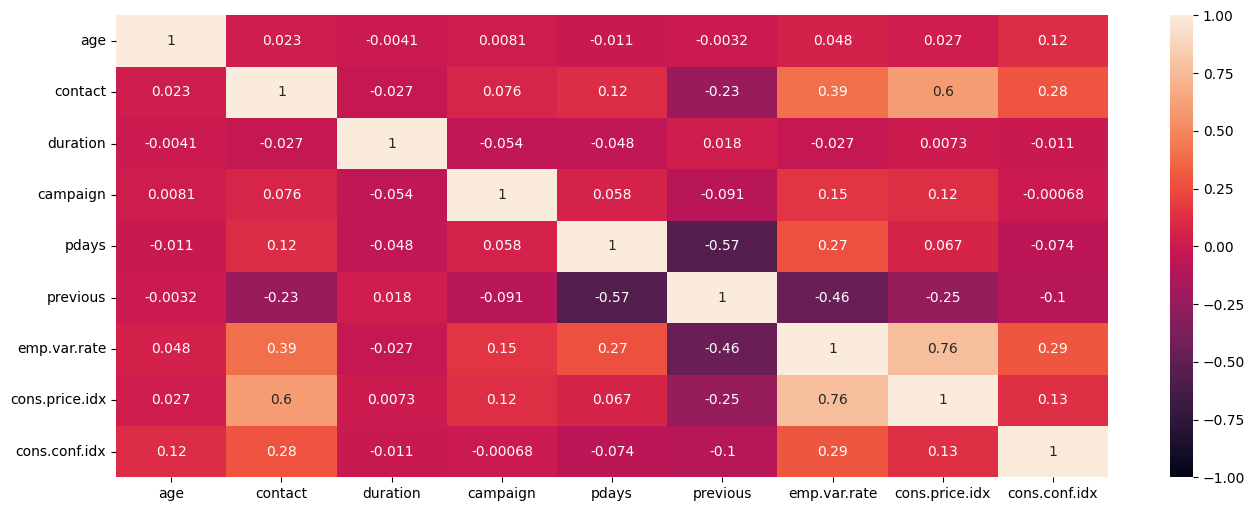

In [77]:
df_for_feature_eng = df[columns_cont]
plt.figure(figsize=(16, 16))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_for_feature_eng.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.

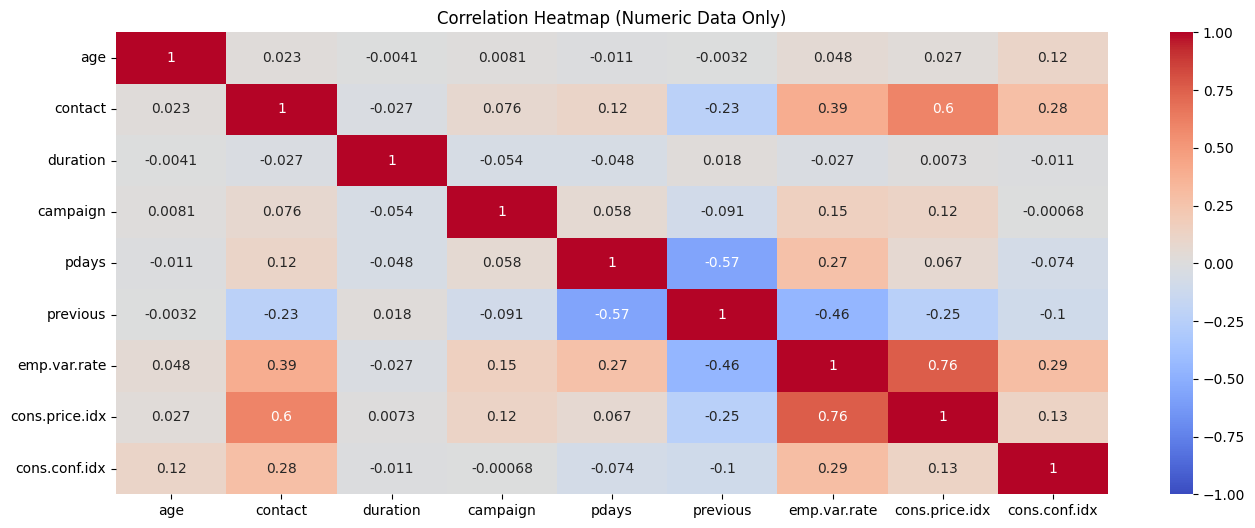

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
df_numeric = df_for_feature_eng.select_dtypes(include=['number'])

# Generate correlation heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_numeric.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Data Only)")
plt.show()


In [84]:
# drop emp.var.rate, cons.price.idx ,euribor3m
X_train = X_train.drop('emp.var.rate', axis= 1)
X_train = X_train.drop('cons.price.idx',axis=  1)
X_train = X_train.drop('euribor3m',axis=  1)
X_test = X_test.drop('emp.var.rate',axis=  1)
X_test = X_test.drop('cons.price.idx',axis=  1)
X_test = X_test.drop('euribor3m',axis=  1)

### PCA Analysis

In [85]:
from sklearn.decomposition import PCA
# see explained variance ratios
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.00000000e+00, 5.73030481e-12, 2.47024605e-12, 2.35638986e-12,
       1.95692031e-12, 1.78763154e-12, 1.51307293e-12, 9.45915398e-13,
       9.07355329e-13, 7.62146840e-13, 5.89949001e-13, 5.25615431e-13,
       4.96643699e-13, 4.83046706e-13, 4.27069431e-13, 3.92872994e-13,
       3.87903764e-13, 3.71198814e-13, 3.64597461e-13, 3.59820338e-13,
       2.66613691e-13, 2.55876087e-13, 2.50672267e-13, 2.20514672e-13,
       1.91838829e-13, 1.54759865e-13, 1.39428136e-13, 1.30220445e-13,
       1.27199824e-13, 1.23603708e-13, 1.02353109e-13, 8.91108771e-14,
       8.44264022e-14, 7.74513981e-14, 6.61789017e-14, 6.33042120e-14,
       5.06317227e-14, 4.57739385e-14, 3.56547371e-14, 2.71210192e-14,
       2.41122329e-14, 2.27888970e-14, 1.56179236e-14, 1.20659658e-14,
       9.21606424e-15, 7.94549235e-15, 4.82873941e-15, 7.94036653e-16,
       2.60568384e-16, 9.96959553e-33, 9.96959553e-33, 9.96959553e-33,
       9.96959553e-33, 9.96959553e-33, 9.96959553e-33, 9.96959553e-33,
      

In [86]:
pca.explained_variance_ratio_[:25].sum()


0.999999999998585

In [87]:
pca = PCA(n_components = 25)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

## Model Training and Evaluation

###  Support Vector Machine Classifier

In [89]:
from sklearn import svm
#Create a svm Classifier
#gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.
clf = svm.SVC(kernel='rbf', gamma=1)
#Train the model using the training sets
clf.fit(X_train_pca, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test_pca)

c:\Users\windo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###  Model Evaluation

In [90]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8934446354038792


### Confusion Matrix

<Figure size 800x800 with 0 Axes>

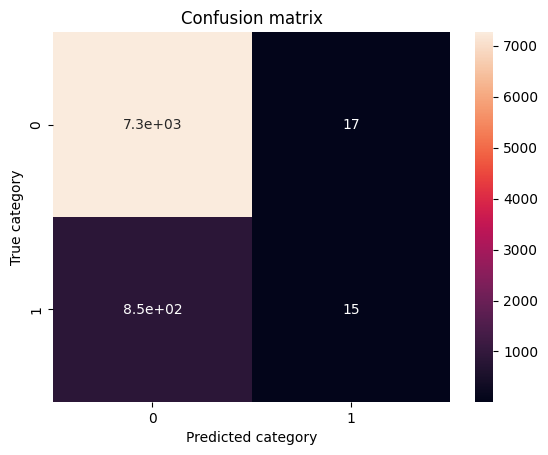

In [91]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,8))
fig, ax = plt.subplots(1)
ax = sns.heatmap(cm, ax=ax, annot=True) #normalize='all'
plt.title('Confusion matrix')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()

### Precision, Recall, and F1 Score

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test = le.fit_transform(y_test)   
y_pred = le.transform(y_pred)       

c:\Users\windo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
print("Precision : ", metrics.precision_score(y_test, y_pred))
print("Recall : ", metrics.recall_score(y_test, y_pred))
print("f1_score:", metrics.f1_score(y_test, y_pred, average="macro"))

Precision :  0.46875
Recall :  0.017321016166281754
f1_score: 0.48851098380099495


##  Improving Model Performance with SMOTE

In [96]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state = 100)
smt = SMOTE(random_state = 101)
X_train, y_train = smt.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50710, 62) (50710, 1)
(12219, 62) (12219, 1)


<Axes: xlabel='y', ylabel='count'>

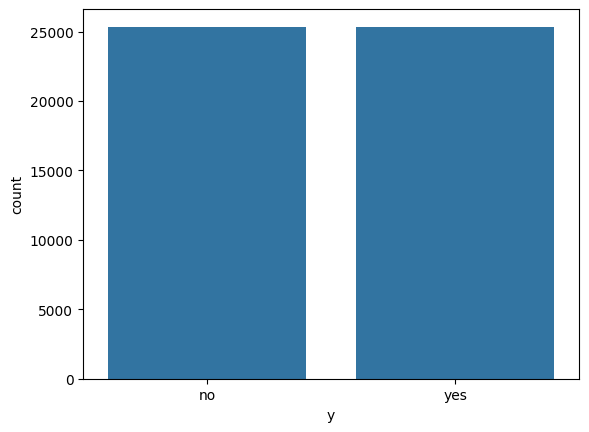

In [98]:
sns.barplot(x=y_train['y'].value_counts().index, y = y_train['y'].value_counts())

In [99]:
pca.explained_variance_[:23].sum()

529110264647.0291

In [100]:
pca= PCA(n_components= 23)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

###  Retraining the Model

In [101]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
#gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
clf = svm.SVC(kernel='rbf',  gamma=0.001, C=100)
#Train the model using the training sets
clf.fit(X_train_pca, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test_pca)

c:\Users\windo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8584990588427859


In [106]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

c:\Users\windo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
print('Precision:', metrics.precision_score(y_test_encoded, y_pred_encoded))
print('Recall:', metrics.recall_score(y_test_encoded, y_pred_encoded))
print("F1 Score:", metrics.f1_score(y_test_encoded, y_pred_encoded))


Precision: 0.42441447835344215
Recall: 0.9178818112049117
F1 Score: 0.5804416403785488


In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded,y_pred_encoded))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91     10916
           1       0.42      0.92      0.58      1303

    accuracy                           0.86     12219
   macro avg       0.71      0.88      0.75     12219
weighted avg       0.93      0.86      0.88     12219

